In [84]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

<bound method GaussianNB.partial_fit of GaussianNB(priors=None, var_smoothing=1e-09)>
Where is malignant cancer?
['M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M']
     radius   texture   perimeter    area   smoothness   compactness  \
14   13.730     22.61       93.60   578.3      0.11310       0.22930   
15   14.540     27.54       96.73   658.8      0.11390       0.15950   
16   14.680     20.13       94.74   684.5      0.09867       0.07200   
17   16.130     20.68      108.10   798.8      0.11700       0.20220   
18   19.810     22.15      130.00  1260.0      0.09831       0.10270   
19   13.540     14.36       87.46   566.3      0.09779       0.08129   
20   13.080     15.71       85.63   520.0      0.10750       0.12700   
21    9.504     12.44       60.34   273.9      0.10240       0.06492   
22   15.340     14.26      102.50   704.4      0.10730       0.21350   

     concavity   concave points   symmetry   fractal dimension  
14     0.21280          0.08025     0.2069             0.07682 

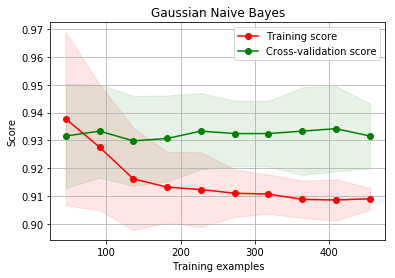

['M']
Where is malignant cancer?
['M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M']
     radius   texture   perimeter    area   smoothness   compactness  \
14   13.730     22.61       93.60   578.3      0.11310       0.22930   
15   14.540     27.54       96.73   658.8      0.11390       0.15950   
16   14.680     20.13       94.74   684.5      0.09867       0.07200   
17   16.130     20.68      108.10   798.8      0.11700       0.20220   
18   19.810     22.15      130.00  1260.0      0.09831       0.10270   
19   13.540     14.36       87.46   566.3      0.09779       0.08129   
20   13.080     15.71       85.63   520.0      0.10750       0.12700   
21    9.504     12.44       60.34   273.9      0.10240       0.06492   
22   15.340     14.26      102.50   704.4      0.10730       0.21350   

     concavity   concave points   symmetry   fractal dimension  
14     0.21280          0.08025     0.2069             0.07682  
15     0.16390          0.07364     0.2303             0.07077  
16     0.0739

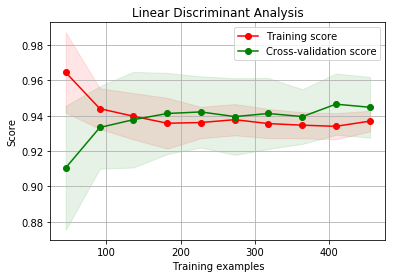

In [85]:
#nb
data = pd.read_csv("wdbc.data", sep = ",")
data = data.iloc[:,0:12]
#print(data.describe())
X = data.iloc[:,2:12]
Y = data.iloc[:,1]

clf = GaussianNB()
partial = clf.partial_fit
print(partial)

clf = GaussianNB()
clf.fit(X, Y)

print("Where is malignant cancer?")
n = 1
print(clf.predict(X[14:23]))
print((X[14:23]))

print(clf.partial_fit)
print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("Gaussian Naive Bayes")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()

#Linear
clf=LinearDiscriminantAnalysis()
clf.fit(X,Y)
print(np.array(clf.predict([X.loc[1]])))

print("Where is malignant cancer?")
n = 1
print(clf.predict(X[14:23]))
print((X[14:23]))

print(np.array(clf.predict([X.loc[1]])))
print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("Linear Discriminant Analysis")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()